In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.drop("date" ,axis=1 , inplace=True)

In [9]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# sns.pairplot(df , hue="price")

In [11]:
x = df.drop("price" , axis=1)
y = df["price"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [13]:
scaler = MinMaxScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [14]:
print('Max: ',X_train.max())
print('Min: ', X_test.min())

Max:  id               9.900000e+09
bedrooms         3.300000e+01
bathrooms        8.000000e+00
sqft_living      1.205000e+04
sqft_lot         1.164794e+06
floors           3.500000e+00
waterfront       1.000000e+00
view             4.000000e+00
condition        5.000000e+00
grade            1.300000e+01
sqft_above       8.860000e+03
sqft_basement    4.820000e+03
yr_built         2.015000e+03
yr_renovated     2.015000e+03
zipcode          9.819900e+04
lat              4.777760e+01
long            -1.213150e+02
sqft_living15    6.210000e+03
sqft_lot15       8.712000e+05
dtype: float64
Min:  id               1.000102e+06
bedrooms         0.000000e+00
bathrooms        0.000000e+00
sqft_living      3.840000e+02
sqft_lot         5.720000e+02
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            4.000000e+00
sqft_above       3.840000e+02
sqft_basement    0.000000e+00
yr_built         1.900000e+03
yr_renovated 

In [15]:
ann_model = Sequential()

# BİRİNCİ KATMAN İÇİN

In [16]:
ann_model.add(Dense(12 ,activation='relu'))

# GİZLİ KATMANLAR

In [17]:
ann_model.add(Dense(32,activation="relu"))

In [18]:
ann_model.add(Dense(16,activation="relu"))

In [19]:
ann_model.add(Dense(8,activation="relu"))

# ÇIKIŞ KATMANI

In [20]:
ann_model.add(Dense(1))


In [21]:
ann_model.compile(optimizer=Adam(learning_rate=0.01), loss="mse")

In [22]:
fit = ann_model.fit(scaler_X_train,y_train,
                    validation_data=(scaler_X_test,y_test),
                     epochs=20,batch_size = 32 )

Epoch 1/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 211347849216.0000 - val_loss: 61419343872.0000
Epoch 2/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 52051779584.0000 - val_loss: 48987910144.0000
Epoch 3/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 35404099584.0000 - val_loss: 44239310848.0000
Epoch 4/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 34643111936.0000 - val_loss: 39822245888.0000
Epoch 5/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32030251008.0000 - val_loss: 39600328704.0000
Epoch 6/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 31684741120.0000 - val_loss: 37487652864.0000
Epoch 7/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 30709524480.0000 - val_loss: 37198979072.0000
Epoch 8/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 29876463616.0000 - val_loss: 36033265664.0000
Epoch 9/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 30553880576.0000 - val_loss: 35094462464.0000
Epoch 10/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1

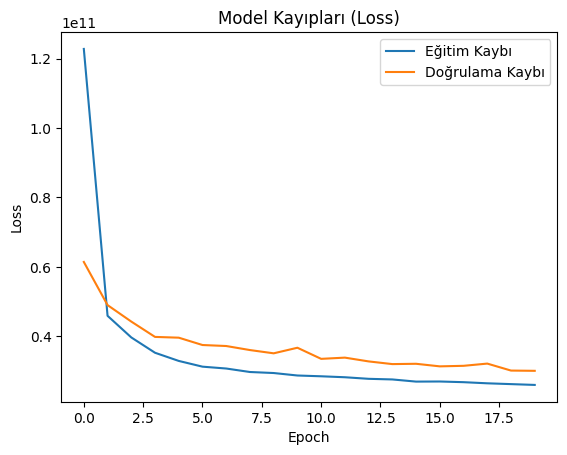

In [23]:
# Eğitim ve doğrulama kaybı grafiği
plt.plot(fit.history['loss'], label='Eğitim Kaybı')
plt.plot(fit.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kayıpları (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


* Eğer kayıp fonksiyonu zamanla azalıyorsa, bu modelin eğitimi başarılı bir şekilde ilerliyor demektir. Aksi takdirde, modelin daha fazla eğitime ihtiyacı olabilir.

* Eğitim kaybı ile doğrulama kaybı arasındaki farkı gözlemlemek de önemli. Eğer doğrulama kaybı artıyorsa, overfitting (aşırı öğrenme) yaşanıyor olabilir. Bu durumda modelin genellenebilirliğini artırmak için önlemler almak gerekebilir.

In [24]:
pred = ann_model.predict(scaler_X_test)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step


In [25]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
evs = explained_variance_score(y_test, pred)



In [26]:
# Sonuçları yazdırma
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Explained Variance Score (EVS): {evs}")

Mean Squared Error (MSE): 30051694264.064987
Mean Absolute Error (MAE): 104845.43006520356
Explained Variance Score (EVS): 0.8015808679462345


* MSE (Mean Squared Error): 30,567,120,331.42

    Bu, modelin hata büyüklüğünü gösteriyor. Daha düşük bir MSE daha iyi sonuç anlamına gelir.

* MAE (Mean Absolute Error): 111,278.96

Modelin tahminlerinde ortalama hata miktarını gösteriyor. Yani model, tahmin ettiği ev fiyatları ile gerçek fiyatlar arasında ortalama 111,279 dolar fark yapıyor.

* EVS (Explained Variance Score): 0.80

Bu, modelin ne kadar iyi tahmin ettiğini gösterir. 1'e yakın bir değer, modelin çok iyi olduğunu belirtir. 0.80 oldukça iyi bir sonuç, yani model verilerin %80'ini doğru şekilde açıklayabiliyor.

# MODELİ DAHA DOĞRU ÇALIŞAN HALE GETİRELİM

In [27]:
ann_model = Sequential()
ann_model.add(Dense(128, activation='relu')) # İnput Katmanı

# Hidden Katmanı
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dense(8, activation='relu'))

ann_model.add(Dense(1))  # Çıktı katmanı



* Modelin öğrenme sürecini nasıl gerçekleştireceğini belirler. Temel olarak 3 bileşeni belirtiyoruz:

Optimizer (Optimizasyon Algoritması): Modelin ağırlıklarını güncelleyerek hatayı azaltan algoritmadır.

Loss (Kayıp Fonksiyonu): Modelin hatasını ölçmek için kullanılır.

Metrics (Opsiyonel): Modelin başarımını değerlendirmek için kullanılan ölçümler.

In [28]:
ann_model.compile(optimizer=Adam(learning_rate=0.01), loss="mse")

In [29]:
fit = ann_model.fit(scaler_X_train, y_train, validation_data=(scaler_X_test, y_test), epochs=100, batch_size=32)


Epoch 1/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 172794445824.0000 - val_loss: 47734591488.0000
Epoch 2/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 39184551936.0000 - val_loss: 41140080640.0000
Epoch 3/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32661413888.0000 - val_loss: 39361069056.0000
Epoch 4/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 31580764160.0000 - val_loss: 36407214080.0000
Epoch 5/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 30135101440.0000 - val_loss: 35432738816.0000
Epoch 6/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 30877093888.0000 - val_loss: 33816483840.0000
Epoch 7/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 30107590656.0000 - val_loss: 32538644480.0000
Epoch 8/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 27160909824.0000 - val_loss: 32601778176.0000
Epoch 9/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 26547318784.0000 - val_loss: 30844190720.0000
Epoch 10/100
541/541 ━━━━━━━━━━━━━━━

In [30]:
pred = ann_model.predict(scaler_X_test)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step


In [31]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
evs = explained_variance_score(y_test, pred)



In [32]:
# Sonuçları yazdırma
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Explained Variance Score (EVS): {evs}")

Mean Squared Error (MSE): 20296598890.577232
Mean Absolute Error (MAE): 77317.68100313729
Explained Variance Score (EVS): 0.8661048423972006


# PEKİ MODELİ NASIL DAHA DA İYİ HALE GETİREBİLİRİZ ? 

✅ Öğrenme Oranı (Learning Rate) ile Oynama

Şu an Adam(learning_rate=0.01) kullanıyoruz. Daha küçük (0.001) veya biraz daha büyük (0.005) bir değerle denemek, modelin daha stabil öğrenmesine yardımcı olabilir.

✅ Katman Sayısını ve Nöronları Değiştirme

✅ Modeli Farklı Optimizer ile Eğitmek

Şu an Adam optimizasyon algoritmasını kullanıyoruz, ama bazen farklı bir optimizer daha iyi sonuç verebilir. Örneğin, RMSprop veya Nadam gibi algoritmalarla deneyebiliriz

✅ Erken Durma (Early Stopping)

Modelin aşırı öğrenme yapmaması için eğitim sırasında doğrulama kaybı artarsa durdurmak adına EarlyStopping kullanabiliriz. Bu, aşırı öğrenme riskiyle karşılaşmadan modelin en iyi sonuçları almasını sağlar.

In [33]:
'''
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

fit = ann_model.fit(scaler_X_train, y_train, validation_data=(scaler_X_test, y_test),
                    epochs=100, batch_size=32, callbacks=[early_stopping])
'''



"\nfrom tensorflow.keras.callbacks import EarlyStopping\n\nearly_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)\n\nfit = ann_model.fit(scaler_X_train, y_train, validation_data=(scaler_X_test, y_test),\n                    epochs=100, batch_size=32, callbacks=[early_stopping])\n"

# SON OLARAK

In [34]:
model = Sequential()

* İNPUT 

In [35]:
model.add(Dense(24,activation="relu"))

* HİDDEN

In [36]:
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))

* OUTPUT

In [37]:
model.add(Dense(1))

* FİT

In [38]:
model.compile(optimizer="adam" , loss="mse")

In [39]:
fit = model.fit(scaler_X_train ,y_train ,
                validation_data=(scaler_X_test,y_test),
                epochs=100 , batch_size=18)

Epoch 1/100
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 244438024192.0000 - val_loss: 76447539200.0000
Epoch 2/100
961/961 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 54593376256.0000 - val_loss: 51945066496.0000
Epoch 3/100
961/961 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 40719974400.0000 - val_loss: 46241443840.0000
Epoch 4/100
961/961 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 38038036480.0000 - val_loss: 42270674944.0000
Epoch 5/100
961/961 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 34759589888.0000 - val_loss: 40398172160.0000
Epoch 6/100
961/961 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32470882304.0000 - val_loss: 39406104576.0000
Epoch 7/100
961/961 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32906506240.0000 - val_loss: 38301007872.0000
Epoch 8/100
961/961 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32309760000.0000 - val_loss: 37555732480.0000
Epoch 9/100
961/961 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 30829987840.0000 - val_loss: 37079150592.0000
Epoch 10/100
961/961 ━━━━━━━━━━━━━━━

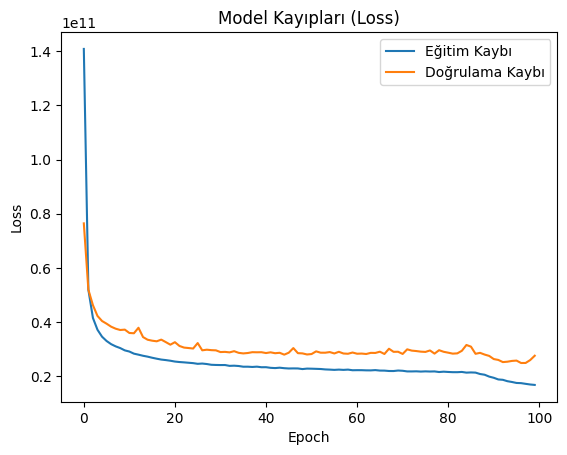

In [40]:
# Eğitim ve doğrulama kaybı grafiği
plt.plot(fit.history['loss'], label='Eğitim Kaybı')
plt.plot(fit.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kayıpları (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [41]:
pred = model.predict(scaler_X_test)
pred = pred.flatten()  # 2D -> 1D dönüşümü


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step


In [42]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
evs = explained_variance_score(y_test, pred)

In [43]:

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Explained Variance Score (EVS): {evs}")


Mean Squared Error (MSE): 27585377375.97869
Mean Absolute Error (MAE): 91008.67659719812
Explained Variance Score (EVS): 0.8235179420601296
